In [1]:
import torch
import matplotlib.pyplot as plt

import os
import sys
import logging
logging.basicConfig(level=logging.INFO)

tensoractpath = os.path.dirname(os.path.abspath(os.getcwd()))
sys.path.append(tensoractpath)

from tensoract.core.lptn import LPTN
from tensoract.models.spin_chains import SpinChain, Heisenberg
from tensoract.solvers.evolution import LindbladOneSite
from tensoract.solvers.optimizer import *

In [2]:
torch.__version__

'2.7.0+cu126'

Later try TFI model too

In [2]:
N = 6

psi = LPTN.gen_polarized_spin_chain(N, polarization='+z')
psi[0] = torch.flip(psi[0], dims=[2])

Jx = 0.1 * torch.pi
Jy = 0.1 * torch.pi
Jz = 0.1 * torch.pi
g = 1.0 * torch.pi

# Try different values of gamma and l_ops
model = Heisenberg(N, Jx, Jy, Jz, g, gamma=0.2, l_ops=SpinChain.sz)

lab = LindbladOneSite(psi, model)

In [3]:
# Try with and without the disentanglement
options = {'disent_step':1, 'disent_sweep':0}
lab.run(20, 0.5, 8, 8, options=options)

  0%|          | 0/20 [00:00<?, ?it/s]INFO:root:norm after 1 sweep(s): (0.9999999999999998-6.938893903907228e-17j)
INFO:root:norm after 1 sweep(s): (1-4.031876828930468e-17j)
INFO:root:norm after 1 sweep(s): (1.0000000000000002+1.6657985312769982e-16j)
INFO:root:norm after 1 sweep(s): (1.0000000000000002-3.1763345748470523e-16j)


INFO:root:norm after 1 sweep(s): (1.0000000000000004-8.677144202868031e-17j)
INFO:root:norm after 1 sweep(s): (0.9999870186816996-3.031858295630074e-17j)
INFO:root:norm after 1 sweep(s): (0.9999916240074648-1.6351956263475758e-16j)
INFO:root:norm after 1 sweep(s): (0.9996177996332775-1.4532290166157855e-16j)
INFO:root:norm after 1 sweep(s): (0.9998471247548621+9.713842660539281e-17j)
INFO:root:norm after 1 sweep(s): (0.9980134722875607-1.2877378369636084e-16j)
INFO:root:norm after 1 sweep(s): (0.9973379510525469+7.162161200891621e-17j)
INFO:root:norm after 1 sweep(s): (0.9976021530285373-1.8278674540216262e-16j)
INFO:root:norm after 1 sweep(s): (0.9965271659085407+2.4922843330126357e-16j)
INFO:root:norm after 1 sweep(s): (0.997024424324985-1.1789597482948433e-16j)
INFO:root:norm after 1 sweep(s): (0.9954326241503967+1.982376851512642e-16j)
INFO:root:norm after 1 sweep(s): (0.9962555075246518-7.049177593639802e-17j)
INFO:root:norm after 1 sweep(s): (0.9940112493336695+1.1899034139733553

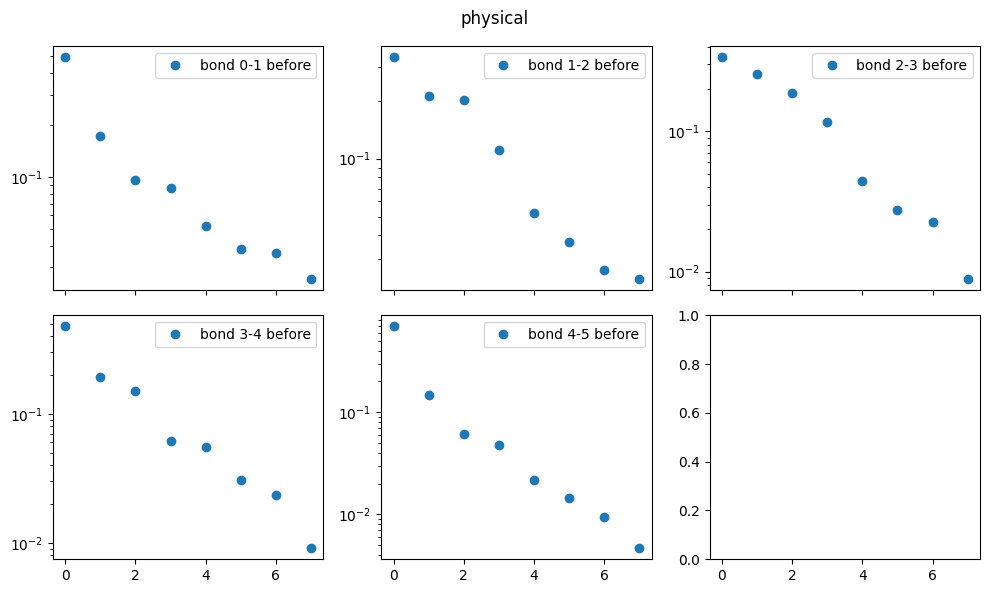

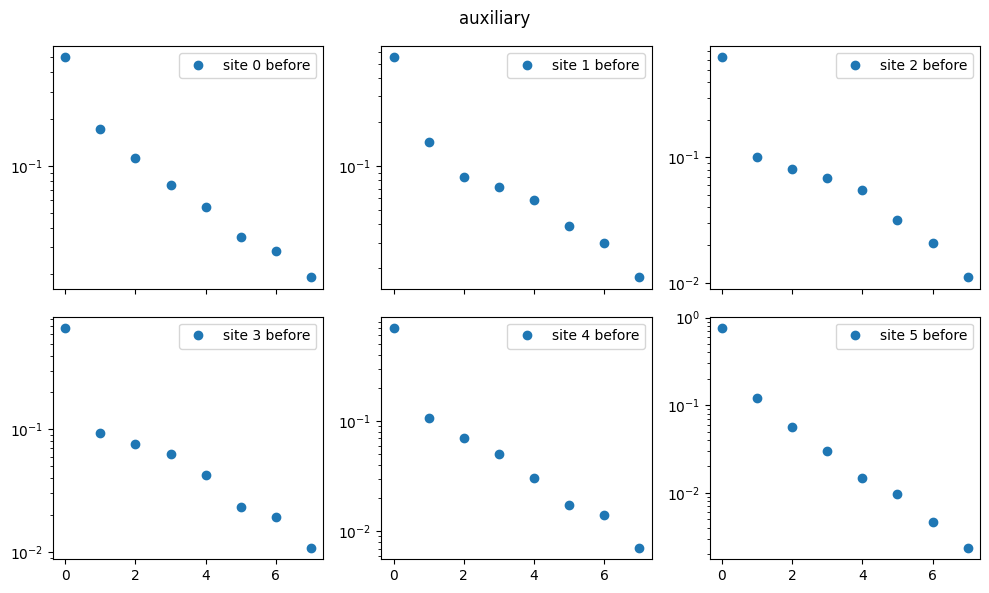

In [4]:
fig0, ax0 = plt.subplots(2, N//2, sharex=True, figsize=(10,6))
fig1, ax1 = plt.subplots(2, N//2, sharex=True, figsize=(10,6))
fig0.suptitle('physical')
fig1.suptitle('auxiliary')

for i in range(N):
    psi.orthonormalize('mixed', i)
    s = psi[i].shape
    mat1 = psi[i].permute(0,2,3,1).view(s[0]*s[2]*s[3], s[1]) # physical leg on the left!
    mat2 = psi[i].reshape(-1, s[-1])
    sigma1 = torch.linalg.svdvals(mat1)**2  # bond between leg i and i+1
    sigma2 = torch.linalg.svdvals(mat2)**2
    ax1.flatten()[i].semilogy(sigma2, 'o', label=f'site {i} before')
    ax1.flatten()[i].legend()
    if i < N-1:
        ax0.flatten()[i].semilogy(sigma1, 'o', label=f'bond {i}-{i+1} before')
        ax0.flatten()[i].legend()

fig0.tight_layout()
fig1.tight_layout()

In [9]:
m_max = k_max = 8

phi = psi.copy()

for niter in range(20):
    disentangle_sweep(phi, tol=1e-12, m_max=m_max, k_max=k_max, max_sweep=1, eps=1e-9, max_iter=40)

    if (niter+1) % 5 == 0:
        for i in range(N):
            phi.orthonormalize('mixed', i)
            s = phi[i].shape
            mat1 = phi[i].permute(0,2,3,1).view(s[0]*s[2]*s[3], s[1]) # physical leg on the left!
            mat2 = phi[i].reshape(-1, s[-1])
            sigma1 = torch.linalg.svdvals(mat1)**2  # bond between leg i and i+1
            sigma2 = torch.linalg.svdvals(mat2)**2
            ax1.flatten()[i].plot(sigma2, 'o', label=f'after {(niter+1)} sweeps')
            ax1.flatten()[i].legend()
            if i < N-1:
                ax0.flatten()[i].plot(sigma1, 'o', label=f'after {(niter+1)} sweeps')
                ax0.flatten()[i].legend()

INFO:root:renyi entropy converged at tol=1e-09 after 32 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 40 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 12 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 2 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 6 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 36 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 2 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 24 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 14 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 3 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 2 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 4 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 29 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 16 iterations
INFO:root:renyi entropy converged at tol=1e-09 after 2 iterations
IN

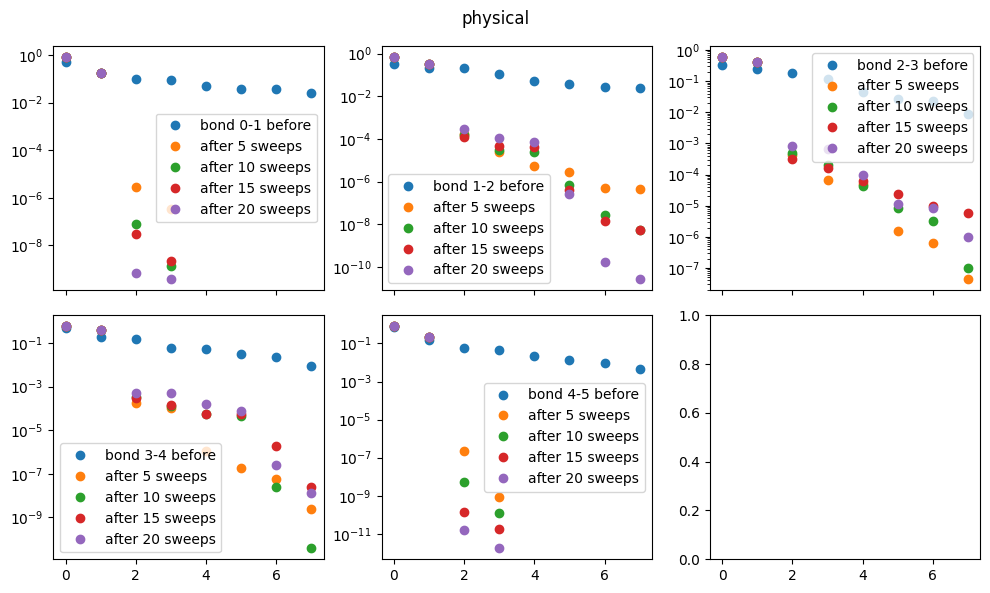

In [10]:
plt.figure(fig0)
plt.show()

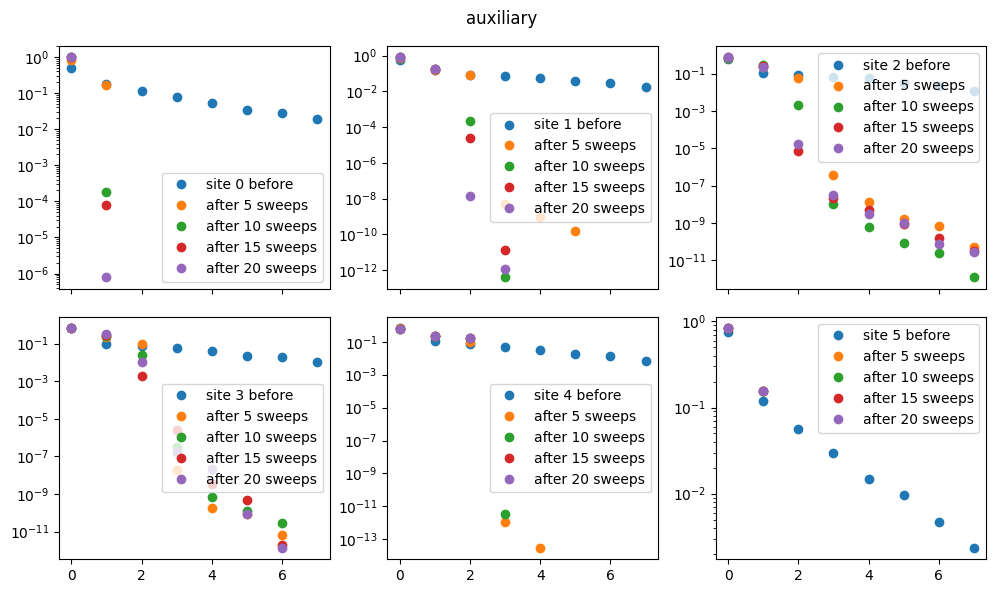

In [11]:
plt.figure(fig1)
plt.show()